<a href="https://colab.research.google.com/github/GarnikAsatryan/-DA_DS/blob/main/DA_DS_vacancies_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Сравнительный анализ вакансий "Аналитик Данных" и "специалист по Data Science"**

## Описание проекта

**Цель исследования:**

Выявить различия в предлагаемых вакансиях для Аналитиков данных и специалистов по Data Science.

**Исходные данные:**

Данные получены из API HH.ru

**План исследования**

1. Предобработка данных:
    - загрузим данные
    - приведем тип данных в соответствие с со смыслом
    - выявим наличие дублей (обработаем дубли)
    - выявим наличие пропусков и заполним по возможности
2. Исследовательский анализ данных:
    - исследуем структуру данных
    - проверим наличие выбросов и аномалий
    - введем (при необходимости) дополнительные категориальные признаки
3. Определим доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science.
4. Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science (отдельно для грейдов Junior, Junior+, Middle, Senior) по следующим параметрам:
    - самые важные hard-skils
    - самые важные soft-skils
5. Определим типичные места работы для Аналитика данных и специалиста по Data Science (отдельно для грейдов Junior, Junior+, Middle, Senior) по следующим параметрам:
    - ТОП-работодателей
    - зарплата
    - тип занятости
    - график работы
6. Расчитаем помесячную динамику количества вакансий для Аналитика данных и специалиста по Data Science (Отдельно для грейдов Junior, Junior+, Middle, Senior).
7. Сформулируем общие выводы и рекомендации.




## Описание данных

Анализ проводится на основе данных полученных из API HH.ru

В нашем распоряжении две таблицы:

`vacancies_ds.xlsx` - вакансии специалиста по Data Science. ссылка для скачивания: https://drive.usercontent.google.com/download?id=19XRCDxHszZSCyw_7qtJGcoZqKOh4YCZu

`vacancies_da (2).xlsx` - вакансии Аналитика данных. ссылка для скачивания: https://drive.usercontent.google.com/download?id=19XRCDxHszZSCyw_7qtJGcoZqKOh4YCZu


Перчень столбцов в обеих таблицах иденичны:

`id` - Уникальный идентификатор вакансии

`name` - Наименование вакансии

`published_at` - Дата и время публикации вакансии

`alternate_url` - Ссылка на представление вакансии на сайте

`type` - Тип вакансии

`employer` - Информация о компании работодателя

`department` - Департамент в компании работодателе

`area` - Регион вакансии

`experience` - Опыт работы

`key_skills` - Список ключевых навыков

`schedule` - Предлагаемый график работы

`employment` - Тип занятости

`description` - Описание вакансии

`description_lemmatized` - Лематизированное описание вакансии (все слова преобразованы в базовую форму)

`salary_from` - Нижняя граница предлагаемой зарплаты

`salary_to` - Верхняя граница предлагаемой зарплаты

`salary_bin` - Категория зарплат. В зависимости от указанных нижней и верхней границ зарплаты в столбце указываются значения: "ЗП не указана", "Меньше 100 тысяч", "От 200 тысяч до 300 тысяч", "Больше 300 тысяч"

`key_skills_from_key_skills_field` - Нормализованный перечень ключевых навыков из поля `key_skills`

`hard_skills_from_description` - Перечень требуемых профессиональных навыков соискателя

`soft_skills_from_description` - Перечень гибких навыков (умения общего характера, тесно связанные с личностными качествами)

## Предобработка данных

In [451]:
# Установим необходимые библиотеки

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="whitegrid")

### Загрузим данные

In [452]:
# загрузим данные о вакансиях Аналитика данных
df_da = pd.read_excel(r'https://drive.usercontent.google.com/download?id=10wEesNpkzQEsPwULjKYnkrIcQYOJ41iI', sheet_name='Sheet1')

In [453]:
# Проверим корректность загрузки
df_da.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация
2,85053196,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053196,Открытая,Axenix (ранее Accenture),NaN,Ростов-на-Дону,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Gre...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация


In [454]:
# загрузим данные о вакансиях специалиста по Data Science
df_ds = pd.read_excel(r'https://drive.usercontent.google.com/download?id=19XRCDxHszZSCyw_7qtJGcoZqKOh4YCZu', sheet_name='Sheet1')

In [455]:
# Проверим корректность загрузки
df_ds.head(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN
2,81857265,Associate Professor - Data Science&AI (english),2024-04-08 16:28:05,https://hh.ru/vacancy/81857265,Открытая,Университет Иннополис,NaN,Санкт-Петербург,Middle (3-6 years),"['Machine Learning', 'Public Speaking', 'Writi...",Полный день,Полная занятость,the faculty of computer science and engineerin...,the faculty of computer science and engineerin...,NaN,NaN,ЗП не указана,"Information Technology, Fluent English, Resear...",Юнит-экономика,NaN


------------------------------------
Обе таблицы содержат одинаковые столбцы подразумевающие одинаковые типы данных и различаются только видом вакансий.

Для удобства предобработки данных и запонения пропущенных значений объединим обе таблицы в один датасет.

Для идентификации (в объединенной таблице) данных по видам вакансий добавим в признак вида вакансии `vcancy_type` с значением `da` для вакансий Аналитик данных и `ds` для вакансий специалиста по Data Science.
________________________________________

In [456]:
df_da['vcancy_type'] = 'da'

In [457]:
df_ds['vcancy_type'] = 'ds'

In [458]:
# Объеденим таблицы
all_vacansy = pd.concat([df_da, df_ds])

In [459]:
# Проверим количество строк из каждой таблицы вошедших в объединенный датасет
all_vacansy['vcancy_type'].value_counts()

vcancy_type
ds    662
da    310
Name: count, dtype: int64

Количество строк с каждого вида вакансий совпадает с количеством строк в исходных таблицах
______________________________________________


### Приведем тип данных в соответствие.

Посмотрим общее описание данных

In [460]:
all_vacansy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 972 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                972 non-null    int64         
 1   name                              972 non-null    object        
 2   published_at                      972 non-null    datetime64[ns]
 3   alternate_url                     972 non-null    object        
 4   type                              972 non-null    object        
 5   employer                          972 non-null    object        
 6   department                        362 non-null    object        
 7   area                              972 non-null    object        
 8   experience                        972 non-null    object        
 9   key_skills                        972 non-null    object        
 10  schedule                          972 non-null    objec

Из общего описания данных видно что типы данных соответствуют представленным данным. Корректировака типа данных пока не требуется.
____________________________________________________

### Проверим наличие дублирующихся строк.

In [461]:
# Проверим наличие полностью дублирующихся строк
print(f'Количество полностью дублирующихся строк - {all_vacansy.duplicated().sum()}')

Количество полностью дублирующихся строк - 0


Наша цель - проанализировать вакансии. Для анализа мы используем публикации вакансий на НН. По одной и той же вакансии может быть несколько публикаций (работодатели иногда убирают публикацию в архив и позже размещают новую публикацию по той же вакансии).

В описаном случае может сохраниться `id` вакансии, но измениться дата публикации (это не явный дубликат).

Проверим количество переопубликованных вакансий.


In [462]:
all_vacansy.duplicated(subset='id').sum()

17

In [463]:
# Сохраним в переменную список дублирующихся id
duples_id = all_vacansy[all_vacansy.duplicated(subset='id')]['id']

In [464]:
# Посмотрим на вакансии с одинаковам id
all_vacansy.query('id in @duples_id').sort_values(by=['id', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vcancy_type
17,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
61,91765959,Дата аналитик (Data Scientist),2024-04-04 10:10:44,https://hh.ru/vacancy/91765959,Открытая,Центр финансовых технологий,NaN,Санкт-Петербург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
18,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
62,91765960,Дата аналитик (Data Scientist),2024-03-28 06:25:29,https://hh.ru/vacancy/91765960,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
56,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
109,93551149,Дата аналитик (Data Scientist),2024-03-19 05:41:39,https://hh.ru/vacancy/93551149,Открытая,Центр финансовых технологий,NaN,Казань,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
74,94241749,Дата аналитик (Data Scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
146,94241749,Дата аналитик (Data Scientist),2024-03-28 06:25:15,https://hh.ru/vacancy/94241749,Открытая,Центр финансовых технологий,NaN,Томск,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
75,94257136,Дата аналитик (Data Scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
149,94257136,Дата аналитик (Data Scientist),2024-03-28 06:25:25,https://hh.ru/vacancy/94257136,Открытая,Центр финансовых технологий,NaN,Екатеринбург,Junior+ (1-3 years),['Pandas'],...,Полная занятость,приглашаем в ml команду специалистов в области...,приглашать ml команда специалист область класс...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds


Мы видим, что у вакансий с дублирующимся id отлтичается только вид вакансии. Значит это одни и те же публикации которые отнесены и к вакансиям Аналитик данных и к Датасайентисиам.


Удалять такие дубли не будем, так как фактически это существующие вакансии со своим набором требований применимые к обоим типам вакансий и должны быть учтены в статистике при раздельном анализе.
___________________________________________________

Мы выяснили, что вакансии с одинаковым айди не являются переопубликованными. Предположим, что при переопубликовании вакансии у неё изменится айди и дата публикации. Посмотрим количество таких неявных дублей.

In [465]:
all_vacansy[all_vacansy.duplicated(
    subset=['name', 'type', 'employer', 'department',
            'area', 'experience', 'key_skills', 'schedule',
            'employment', 'description', 'salary_bin', 'vcancy_type'],
    keep=False
    )].sort_values(by=['name', 'employer', 'area', 'experience','key_skills', 'published_at'])

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,vcancy_type
86,94702965,Data Analyst,2024-03-13 16:57:00,https://hh.ru/vacancy/94702965,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
290,97831652,Data Analyst,2024-04-24 16:47:53,https://hh.ru/vacancy/97831652,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,наша команда занимается разработкой и внедрени...,наш команда заниматься разработка внедрение ml...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,da
62,93826192,Data Analyst,2024-03-27 16:29:20,https://hh.ru/vacancy/93826192,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
276,97741410,Data Analyst,2024-04-23 16:32:21,https://hh.ru/vacancy/97741410,Открытая,СБЕР,Сбер. Data Science,Москва,Junior+ (1-3 years),['Документация'],...,Полная занятость,в настоящее время сбербанк активно развивает н...,настоящий время сбербанк активно развивать нап...,NaN,NaN,ЗП не указана,NaN,NaN,Документация,da
95,94827220,Data Analyst,2024-03-15 13:54:00,https://hh.ru/vacancy/94827220,Открытая,СБЕР,Сбер для экспертов,Санкт-Петербург,Junior+ (1-3 years),['Креативность'],...,Полная занятость,мы команда аналитического управления центра ко...,команда аналитический управление центр комплае...,NaN,NaN,ЗП не указана,NaN,NaN,Креативность,da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,96727424,Специалист по Data Science,2024-04-11 15:21:38,https://hh.ru/vacancy/96727424,Открытая,БАНК УРАЛСИБ,NaN,Москва,Junior+ (1-3 years),['Pandas'],...,Полная занятость,чем предстоит заниматься принимать участие в...,предстоять заниматься принимать участие весь э...,NaN,NaN,ЗП не указана,NaN,Pandas,NaN,ds
145,94235433,Эконометрист (junior data scientist),2024-03-05 01:51:46,https://hh.ru/vacancy/94235433,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,Полная занятость,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds
435,96175298,Эконометрист (junior data scientist),2024-04-04 12:33:52,https://hh.ru/vacancy/96175298,Открытая,Аналитический центр при Правительстве Российск...,NaN,Москва,Junior+ (1-3 years),"['Machine Learning', 'Эконометрика', 'Python',...",...,Полная занятость,задачи: разработка алгоритмов предварительног...,задача разработка алгоритм предварительный ана...,NaN,NaN,ЗП не указана,"Python, Статистический анализ, SQL, Математиче...",NaN,NaN,ds
359,95613788,Эконометрист / Data scientist,2024-03-27 13:03:38,https://hh.ru/vacancy/95613788,Открытая,Okkam,NaN,Москва,Middle (3-6 years),"['Pandas', 'Коммуникация']",...,Полная занятость,привет!мы - коммуникационная группа okkam. наш...,привет коммуникационный группа okkam наш специ...,NaN,NaN,ЗП не указана,NaN,Pandas,Коммуникация,ds


In [466]:
# Зафиксируем количество строк до удаления дублей
df_after_drop = all_vacansy.shape[0]

Удалим дубликаты (дублирующиеся публикации одной вакансии)

In [467]:
all_vacansy = all_vacansy.drop_duplicates(
              subset=['name', 'type', 'employer', 'department',
                      'area', 'experience', 'key_skills', 'schedule',
                      'employment', 'description', 'salary_bin', 'vcancy_type'],
              keep='last'
              )

In [468]:
# Проверим какой процент данных мы удалили
print(f'Удалили {(df_after_drop - all_vacansy.shape[0]) / df_after_drop:.2%} данных')

Удалили 7.41% данных


In [469]:
all_vacansy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 661
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                900 non-null    int64         
 1   name                              900 non-null    object        
 2   published_at                      900 non-null    datetime64[ns]
 3   alternate_url                     900 non-null    object        
 4   type                              900 non-null    object        
 5   employer                          900 non-null    object        
 6   department                        330 non-null    object        
 7   area                              900 non-null    object        
 8   experience                        900 non-null    object        
 9   key_skills                        900 non-null    object        
 10  schedule                          900 non-null    objec

### Проверим неявные дубли в отдельных признаках

In [470]:
# Посмотрим количество уникальных названий вакансий
all_vacansy['name'].nunique()

548

In [471]:
# Проверим, изменится ли количество уникальных значений если
# удалить лишние пробелы в начале и конце названия и привести его к нижнему регистру
all_vacansy['name'].str.lower().str.strip().nunique()

507

In [472]:
# Посмотрим ТОП 20 уникальных названий по количеству вакансий
all_vacansy['name'].value_counts().head(20)

name
Data Scientist                                              85
Data Analyst                                                57
Senior Data Scientist                                       19
Data scientist                                              14
Дата аналитик (Data Scientist)                              12
Middle Data Scientist                                       11
Аналитик данных / Data Analyst                               9
Data analyst                                                 9
Senior Data Analyst                                          8
Junior Data Scientist                                        7
Бизнес-аналитик со знанием SQL (удаленно)/Data scientist     6
Data Scientist (Middle) с переездом в Южно-Сахалинск         6
Data Scientist (middle)                                      6
Senior Data Scientist (NLP)                                  6
Senior Data Scientist в команду антифрода                    5
Data Scientist (NLP)                              

У нас 548 уникальных названий вакансий. Часть названий содержит дополнительную информацию не относящуюся к названию. Но изменять их не будем т.к. для целей аналиа данный признак не является категориальным.
_________________________________________________________


In [473]:
# Посмотрим количество уникальных названий работодателей
all_vacansy['employer'].nunique()

361

In [474]:
# Проверим, изменится ли количество уникальных значений если
# удалить лишние пробелы в начале и конце названия и привести его к нижнему регистру
all_vacansy['employer'].str.lower().str.strip().nunique()

361

In [475]:
# Посмотрим ТОП 20 работодаелей по количеству опубликованных вакансий
all_vacansy['employer'].value_counts().head(20)

employer
СБЕР                             180
WILDBERRIES                       21
Ozon                              19
Газпромбанк                       17
Samokat.tech                      16
Центр финансовых технологий       12
Банк ВТБ (ПАО)                    12
МТС                               11
Okko                              10
Lamoda Tech                        9
билайн                             9
Ростелеком                         9
Т1                                 8
Сахалин - Остров Возможностей      8
МАГНИТ, Розничная сеть             8
МегаФон                            7
1221Системс                        7
Университет Иннополис              6
Газпром нефть                      6
ARK                                6
Name: count, dtype: int64

In [476]:
# Посмотрим количество уникальных названий городов
all_vacansy['area'].nunique()

26

In [477]:
# Проверим, изменится ли количество уникальных значений если
# удалить лишние пробелы в начале и конце названия и привести его к нижнему регистру
all_vacansy['area'].str.lower().str.strip().nunique()

26

In [478]:
# Посмотрим ТОП 20 городов по количеству опубликованных вакансий
all_vacansy['area'].value_counts().head(20)

area
Москва                          690
Санкт-Петербург                  96
Новосибирск                      18
Екатеринбург                     17
Нижний Новгород                  16
Казань                           14
Краснодар                         7
Томск                             5
Воронеж                           4
Ростов-на-Дону                    4
Самара                            4
Тюмень                            4
Владивосток                       3
Ижевск                            3
Сочи                              2
Калининград                       2
Пермь                             2
Киров (Кировская область)         1
Иваново (Ивановская область)      1
Челябинск                         1
Name: count, dtype: int64

In [479]:
# Посмотрим количество уникальных названий городов
all_vacansy['experience'].nunique()

4

In [480]:
# Посмотрим количество уникальных категорий по опыту работы
all_vacansy['experience'].value_counts()

experience
Junior+ (1-3 years)      431
Middle (3-6 years)       411
Junior (no experince)     33
Senior (6+ years)         25
Name: count, dtype: int64

Названия категорий по опыту работы внесены корректно
____________________________________________________

In [481]:
# Посмотрим количество уникальных грейдов по уровню зарплат
all_vacansy['salary_bin'].value_counts()

salary_bin
ЗП не указана                824
Больше 300 тысяч              32
От 200 тысяч до 300 тысяч     24
От 100 тысяч до 200 тысяч     14
Меньше 100 тысяч               6
Name: count, dtype: int64

Названия категорий грейдов по уровню зарплат внесены корректно
____________________________________________________

In [482]:
# Посмотрим количество уникальных значений ключевых навыков
all_vacansy['key_skills_from_key_skills_field'].nunique()

419

In [483]:
# Посмотрим ТОП 20 уникальных сочетаний значений ключевых навыковв по количеству опубликованных вакансий
all_vacansy['key_skills_from_key_skills_field'].value_counts().head(20)

key_skills_from_key_skills_field
Python, SQL                                                                                                           9
SQL, Python                                                                                                           7
Python, SQL, A/B тесты                                                                                                7
Работа в команде, SQL, Умение работать в коллективе, Умение планировать, Планирование карьеры                         6
Information Technology, Fluent English, Research, Public Speaking, Machine Learning, Data Mining, Writing Articles    5
SQL, Python, A/B тесты                                                                                                4
Математический анализ, Математическая статистика, SQL, Python                                                         4
Python                                                                                                                4
Python,

In [484]:
# Посмотрим количество уникальных значений hard_skills
all_vacansy['hard_skills_from_description'].nunique()

8

In [485]:
# Посмотрим рейтинг значений hard_skills по количеству опубликованных вакансий
all_vacansy['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                                256
confluence                             51
Юнит-экономика                         42
Pandas, confluence                     23
Pandas, Юнит-экономика                  9
Pandas, confluence, Юнит-экономика      2
Pandas, Google Sheets                   1
confluence, Юнит-экономика              1
Name: count, dtype: int64

In [486]:
# Посмотрим количество уникальных значений soft_skill
all_vacansy['soft_skills_from_description'].nunique()

27

In [487]:
# Посмотрим рейтинг уникальных значений soft_skill по количеству опубликованных вакансий
all_vacansy['hard_skills_from_description'].value_counts()

hard_skills_from_description
Pandas                                256
confluence                             51
Юнит-экономика                         42
Pandas, confluence                     23
Pandas, Юнит-экономика                  9
Pandas, confluence, Юнит-экономика      2
Pandas, Google Sheets                   1
confluence, Юнит-экономика              1
Name: count, dtype: int64

In [488]:
#all_vacansy['key_skills_from_key_skills_field'].str.split(',').explode().str.strip().value_counts()

### Проверим пропуски в категриальных признаках

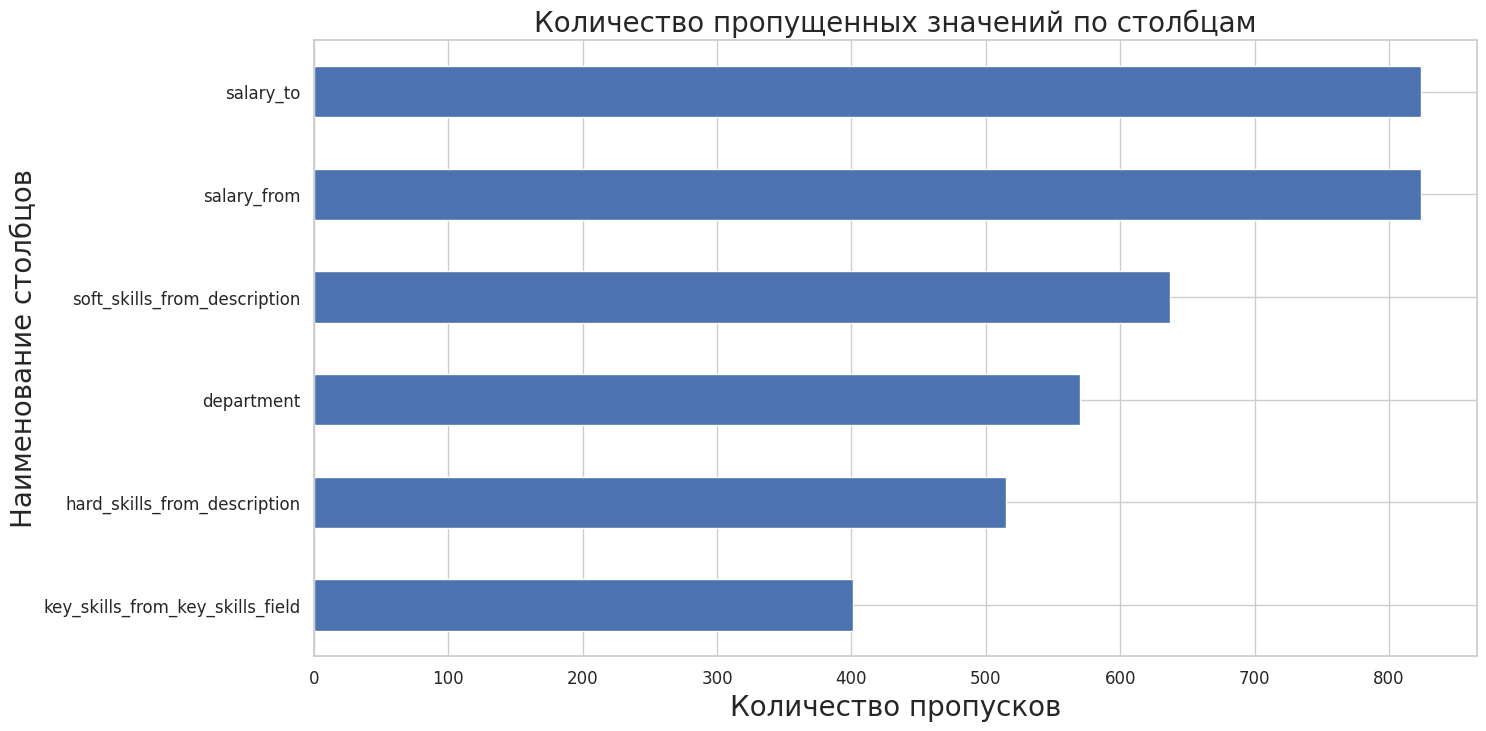

In [489]:
# Проверим количество пропущенных значений в столбцах.
all_vacansy.isna().sum().sort_values().loc[all_vacansy.isna().sum() > 0].plot(kind='barh', figsize=(15, 8), grid=True, fontsize=12)
plt.title('Количество пропущенных значений по столбцам', fontsize=20)
plt.xlabel('Количество пропусков', fontsize=20)
plt.ylabel('Наименование столбцов', fontsize=20)
plt.show()

Пропуски данных в столбцах `salary_from` и `salary_to` вызваны тем, что работодатели в обявлениях часто не указывают предлагаемый грейд. Пропуски в этих столбцах заполнять не будем, т.к. нет объективной связянной информации чтоб расчитать уровень оплаты предлагаемый конкретным работодателем. Пропусками оплаты в строках компенсируются значением "Зарплата не указана" в столбце `salary_bin`.
__________________________________________________________

#### Проверим пропуски в столбцах с требуемыми навыками

In [490]:
all_vacansy[['key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description']].isna().sum()

key_skills_from_key_skills_field    401
hard_skills_from_description        515
soft_skills_from_description        637
dtype: int64

Наиболее заполненным в таблице является столбец  'key_skills_from_key_skills_field'. Попробуем заполнить пропуски в этом столбце.

Проверим есть ли вакансии у которых заполнено значение в столбце 'key_skills', но пропуск в столбце'key_skills_from_key_skills_field'.

In [491]:
(all_vacansy.query('key_skills_from_key_skills_field.isna() & key_skills.notna()')
[['key_skills', 'key_skills_from_key_skills_field']]
 ).count()

key_skills                          401
key_skills_from_key_skills_field      0
dtype: int64

Видим, что есть 401 строка в которой можно заполнить 'key_skills_from_key_skills_field' из 'key_skills'

In [492]:
# Приведем значения в столбце 'key_skills' к типу "строка" и удалим лишние символы
all_vacansy['key_skills'] = all_vacansy['key_skills'].apply(lambda x: x.replace('"', '').replace('[', '').replace(']', '').replace("'", ""))

In [493]:
# Проверим какими значениями заполнены поля
all_vacansy['key_skills'].value_counts()

key_skills
                                                                                                                      167
Pandas                                                                                                                 80
Документация                                                                                                           34
Коммуникация                                                                                                           21
Pandas, Документация                                                                                                   15
                                                                                                                     ... 
Pandas, Аналитическое мышление                                                                                          1
Анализ рисков, Оценка рисков, Ad Hoc Analysis, Портфельные риски, кредитные риски, SQL                                  1
Pandas, Git, 

Видно что в 167 строках значение пробел (значит в столбце "key_skills" был пустой список). При заполнении оставим в соответствующих строках столбца 'key_skills_from_key_skills_field' значение  в эти ячейки значение NaN

In [494]:
# Заполним пропуски в столбце "key_skills_from_key_skills_field" значениями из столбца "key_skills"
all_vacansy.loc[(all_vacansy['key_skills_from_key_skills_field'].isna()) & (all_vacansy['key_skills'] != ''), 'key_skills_from_key_skills_field'] = \
all_vacansy.loc[(all_vacansy['key_skills_from_key_skills_field'].isna()) & (all_vacansy['key_skills'] != ''), 'key_skills']

In [495]:
# Проверим оставшееся количество пропусков
all_vacansy['key_skills_from_key_skills_field'].isna().sum()

167

Из 401 пропуска заполнили 234. осталось 167 пропусков.

Проверим какими значениями заполнены пропуски

In [496]:
all_vacansy['key_skills_from_key_skills_field'].value_counts()

key_skills_from_key_skills_field
Pandas                                                                                                                                                          80
Документация                                                                                                                                                    34
Коммуникация                                                                                                                                                    21
Юнит-экономика                                                                                                                                                  15
Pandas, Документация                                                                                                                                            15
                                                                                                                                                        

In [497]:
all_vacansy[['key_skills_from_key_skills_field',
       'hard_skills_from_description', 'soft_skills_from_description']].isna().mean()*100

key_skills_from_key_skills_field    18.555556
hard_skills_from_description        57.222222
soft_skills_from_description        70.777778
dtype: float64

По категориальным значениям связанным с требованиями к навыкам соискателей, количество пропусков составляет:
 - ключевые навыки - не заполнено 18.5 %
 - хард скилы - не заполнено 57.2 %
 - софт скилы - не заполнено 70.8 %

В дальнейшем анализе основной упор будем делать на ключевые навыки как на более заполненные данные

## Определим доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и Специалист по Data Science

In [498]:
# Подготовим данные
da_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'da']['experience'].value_counts().sort_index()
ds_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'ds']['experience'].value_counts().sort_index()

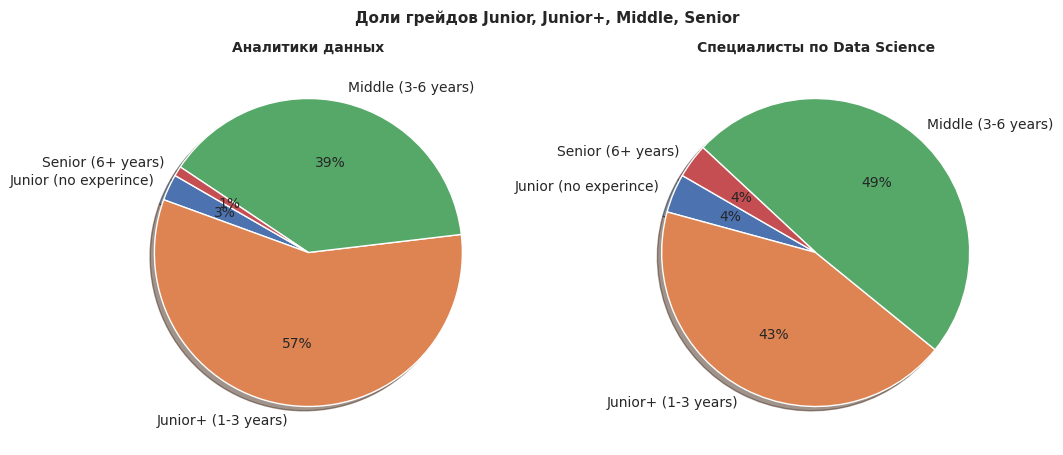

In [499]:
# Сформируем поле для диаграмм
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Создадим круговую диаграмму по аналитикам данных
ax[0].pie(da_df,
          labels= [lbl for lbl, value in da_df.items()],
          shadow=True,
          startangle=150,
          autopct='%1.f%%',
          textprops={'fontsize': 10})
ax[0].set_title('Аналитики данных', fontsize=10, fontweight='bold')

# Создадим круговую диаграмму для Специалистов по Data Science
ax[1].pie(ds_df,
       labels= [lbl for lbl, value in ds_df.items()],
       shadow=True,
       startangle=150,
       autopct='%1.f%%',
       textprops={'fontsize': 10})
ax[1].set_title('Специалисты по Data Science', fontsize=10, fontweight='bold')

plt.suptitle('Доли грейдов Junior, Junior+, Middle, Senior', fontsize=11, fontweight='bold')
plt.show()

### Из анализ распределения грейдов в опубликованных вакансиях видно что:
 - на должность Аналитик данных предпочитают нанимать соискателей категории Junior+ с опытом от 1 до 3 лет
 - для должности Специалист по Data Science больший спрос на соискателей категории Middle с опытом от 3 до 6 лет
 - для обеих профессий примерно одинаковое количество вакансий для соискателей без опыта (3-4%)

 Интересно, что потребность в кандидатах уровеня Senior у Аналитиков данных всего 1%, тогда как для Специалист по Data Science 4%
____________________________________________________

## Определим наиболее желаемых кандидатов на вакансии Аналитик данных и Специалист по Data Science (отдельно для грейдов Junior, Junior+, Middle, Senior)

In [500]:
# Подготовим данные и составим рейтинг востребованных скилов
df_skills = all_vacansy[['id',
                         'vcancy_type',
                         'experience',
                         'key_skills_from_key_skills_field'
                         ]].reset_index(drop=True)

In [501]:
# Преобразуем перечень скилов в список
df_skills['key_skills_from_key_skills_field'] = df_skills['key_skills_from_key_skills_field'].str.split(',')

In [502]:
# Выведем каждый скил в отдельную строку
df_skills = df_skills.explode('key_skills_from_key_skills_field')

In [503]:
df_skills['key_skills_from_key_skills_field'] = (df_skills['key_skills_from_key_skills_field']
                                                 .str.lower().str.strip())

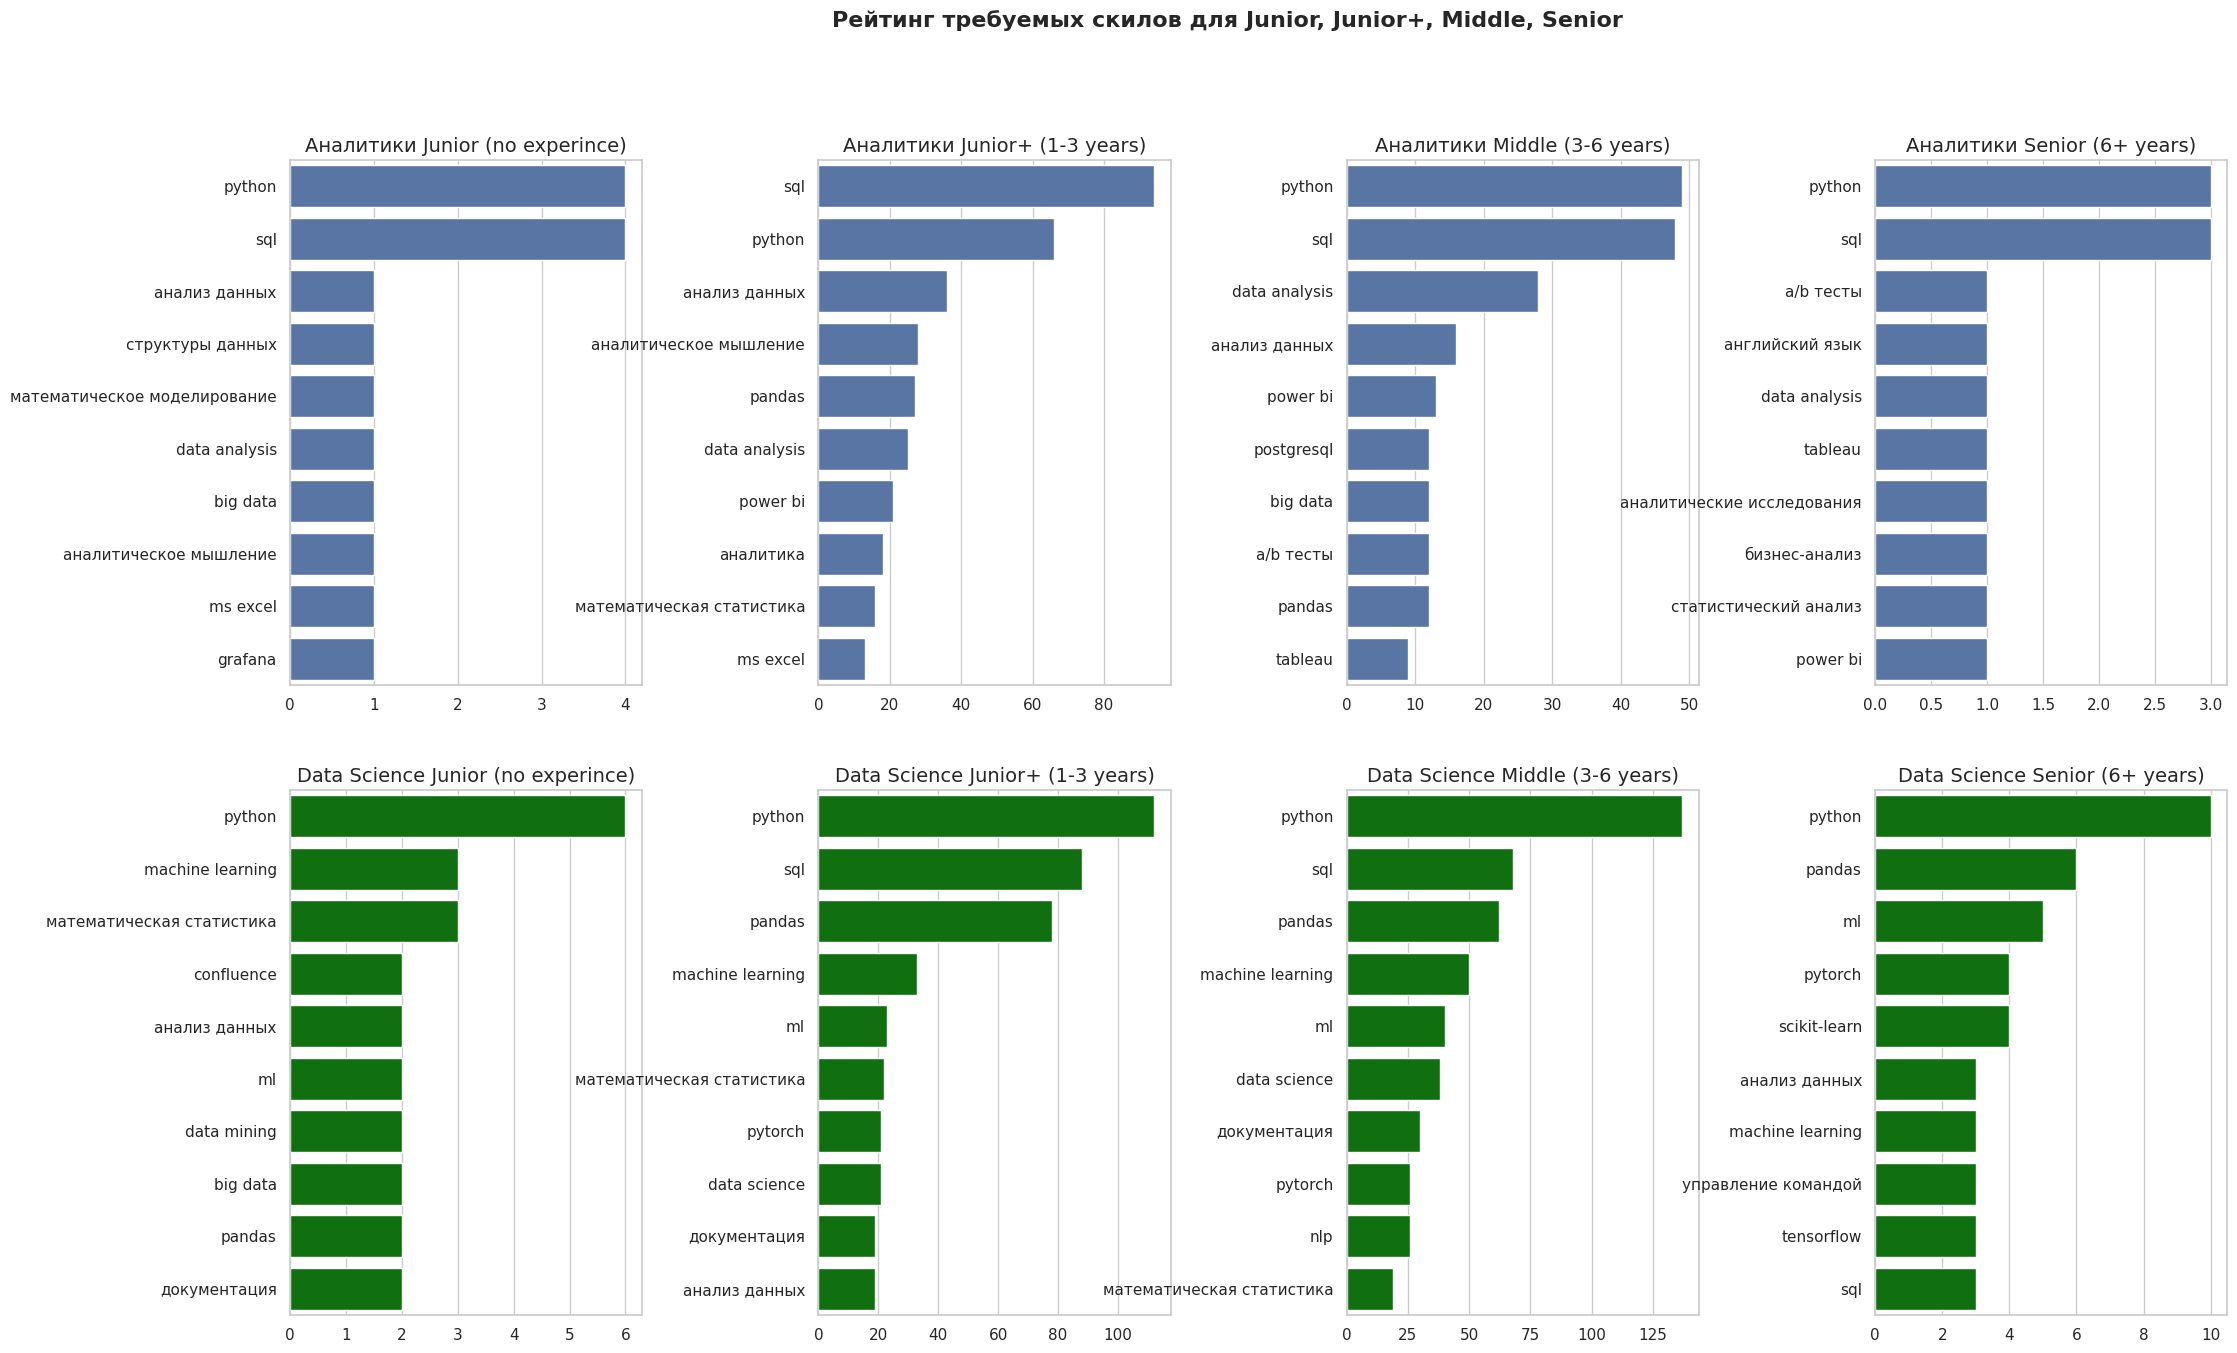

In [504]:
# Построим графики с рейтингом скилов
# Сформируем поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(25, 15))
plt.suptitle('Рейтинг требуемых скилов для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'da') & (df_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'ds') & (df_skills['experience'] == f'{experience[i]}')
      , 'key_skills_from_key_skills_field']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=da_skils, ax=ax[0, i])
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')


  # График для Специалистов по Data Science
  sns.barplot(x='count', y='key_skills_from_key_skills_field', data=ds_skils, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')

plt.subplots_adjust(wspace = 0.5)
plt.show()

Рейтинг ключевых навыков соискателей которые работодатель указывает в вакансиях показывает, что для обеих профессий наиболее важными навыками являются владение зыком програмирования PYTHON и языком запросов SQL и основы статистики, то логично, т.к. основа деятельности это извлечение, обработка и анализ информации.

Основные отличия в том, что от  Аналитиков данных работодатели ожидают владения Excel и инструментами построения Дашбордов (Tableu, Grafana, Power BI),
а от Специалистов по Data Science владение специализированными библиотеками Scikit-learn, PyTorch и TensorFlow.

_________________________________________________

In [505]:
# Подготовим данные и составим рейтинг востребованных Хард скилов
df_skills = all_vacansy[['id',
                         'vcancy_type',
                         'experience',
                         'hard_skills_from_description'
                         ]].reset_index(drop=True)

# Преобразуем перечень скилов в список
df_skills['hard_skills_from_description'] = df_skills['hard_skills_from_description'].str.split(',')

# Выведем каждый скил в отдельную строку
df_skills = df_skills.explode('hard_skills_from_description')

# Переведем значения в нижний регистр и удалим лишние пробелы с начала и с конца названия
df_skills['hard_skills_from_description'] = (df_skills['hard_skills_from_description']
                                                 .str.lower().str.strip())

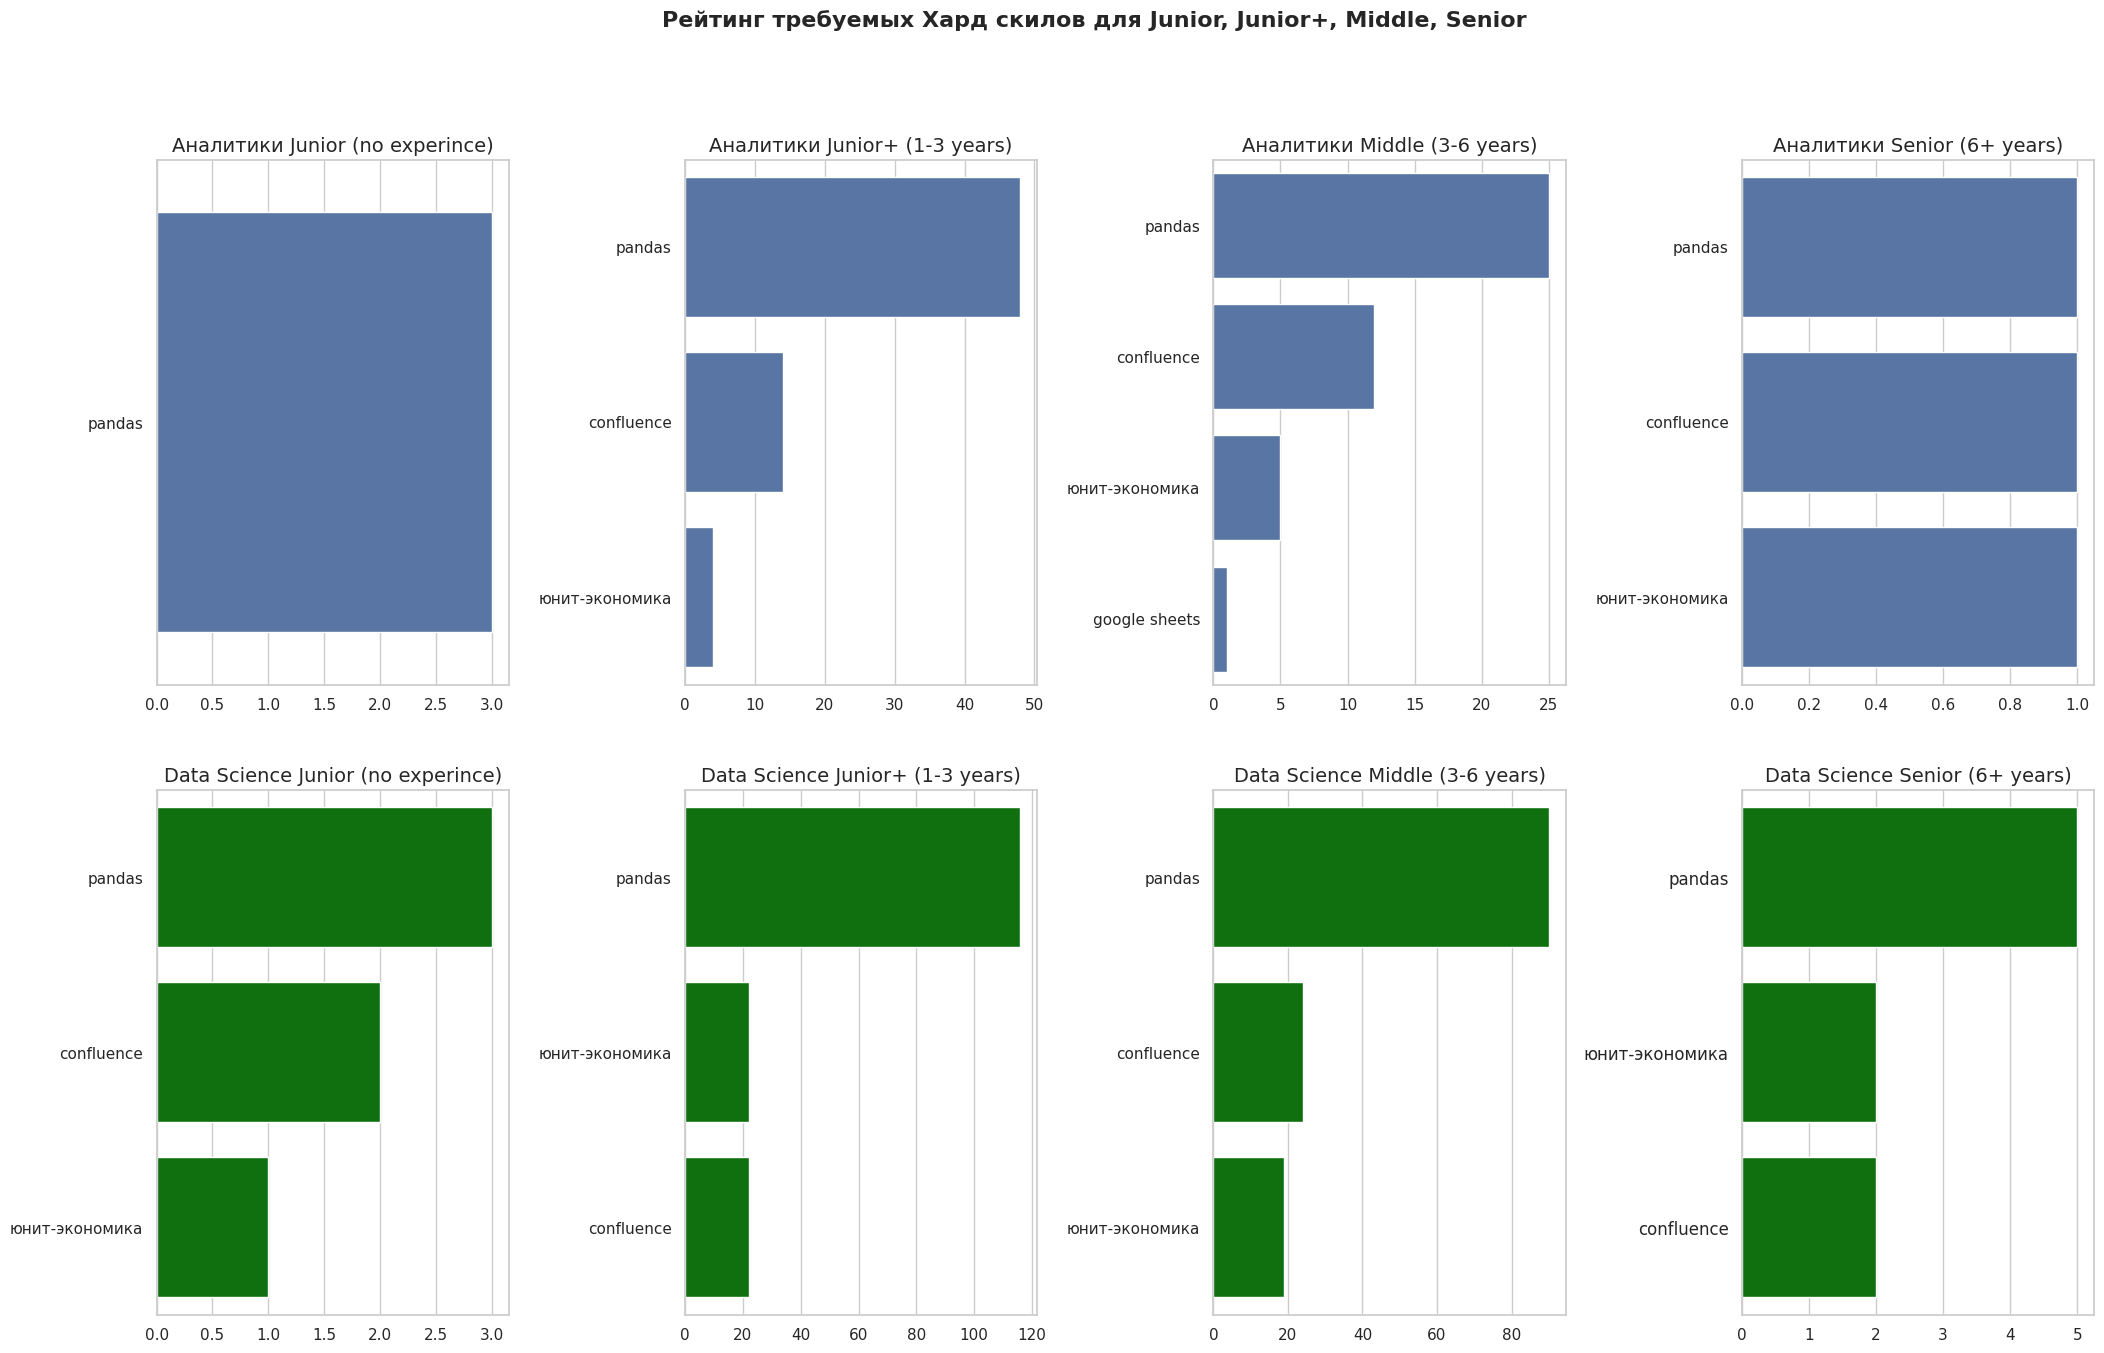

In [506]:
# Построим графики с рейтингом Хард скилов
# Сформируем поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(25, 15))
plt.suptitle('Рейтинг требуемых Хард скилов для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'da') & (df_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'ds') & (df_skills['experience'] == f'{experience[i]}')
      , 'hard_skills_from_description']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='hard_skills_from_description', data=da_skils, ax=ax[0, i])
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')


  # График для Специалистов по Data Science
  sns.barplot(x='count', y='hard_skills_from_description', data=ds_skils, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.yticks(fontsize=12)
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [507]:
# Подготовим данные и составим рейтинг востребованных софт скилов
df_skills = all_vacansy[['id',
                         'vcancy_type',
                         'experience',
                         'soft_skills_from_description'
                         ]].reset_index(drop=True)

# Преобразуем перечень скилов в список
df_skills['soft_skills_from_description'] = df_skills['soft_skills_from_description'].str.split(',')

# Выведем каждый скил в отдельную строку
df_skills = df_skills.explode('soft_skills_from_description')

# Переведем значения в нижний регистр и удалим лишние пробелы с начала и с конца названия
df_skills['soft_skills_from_description'] = (df_skills['soft_skills_from_description']
                                                 .str.lower().str.strip())

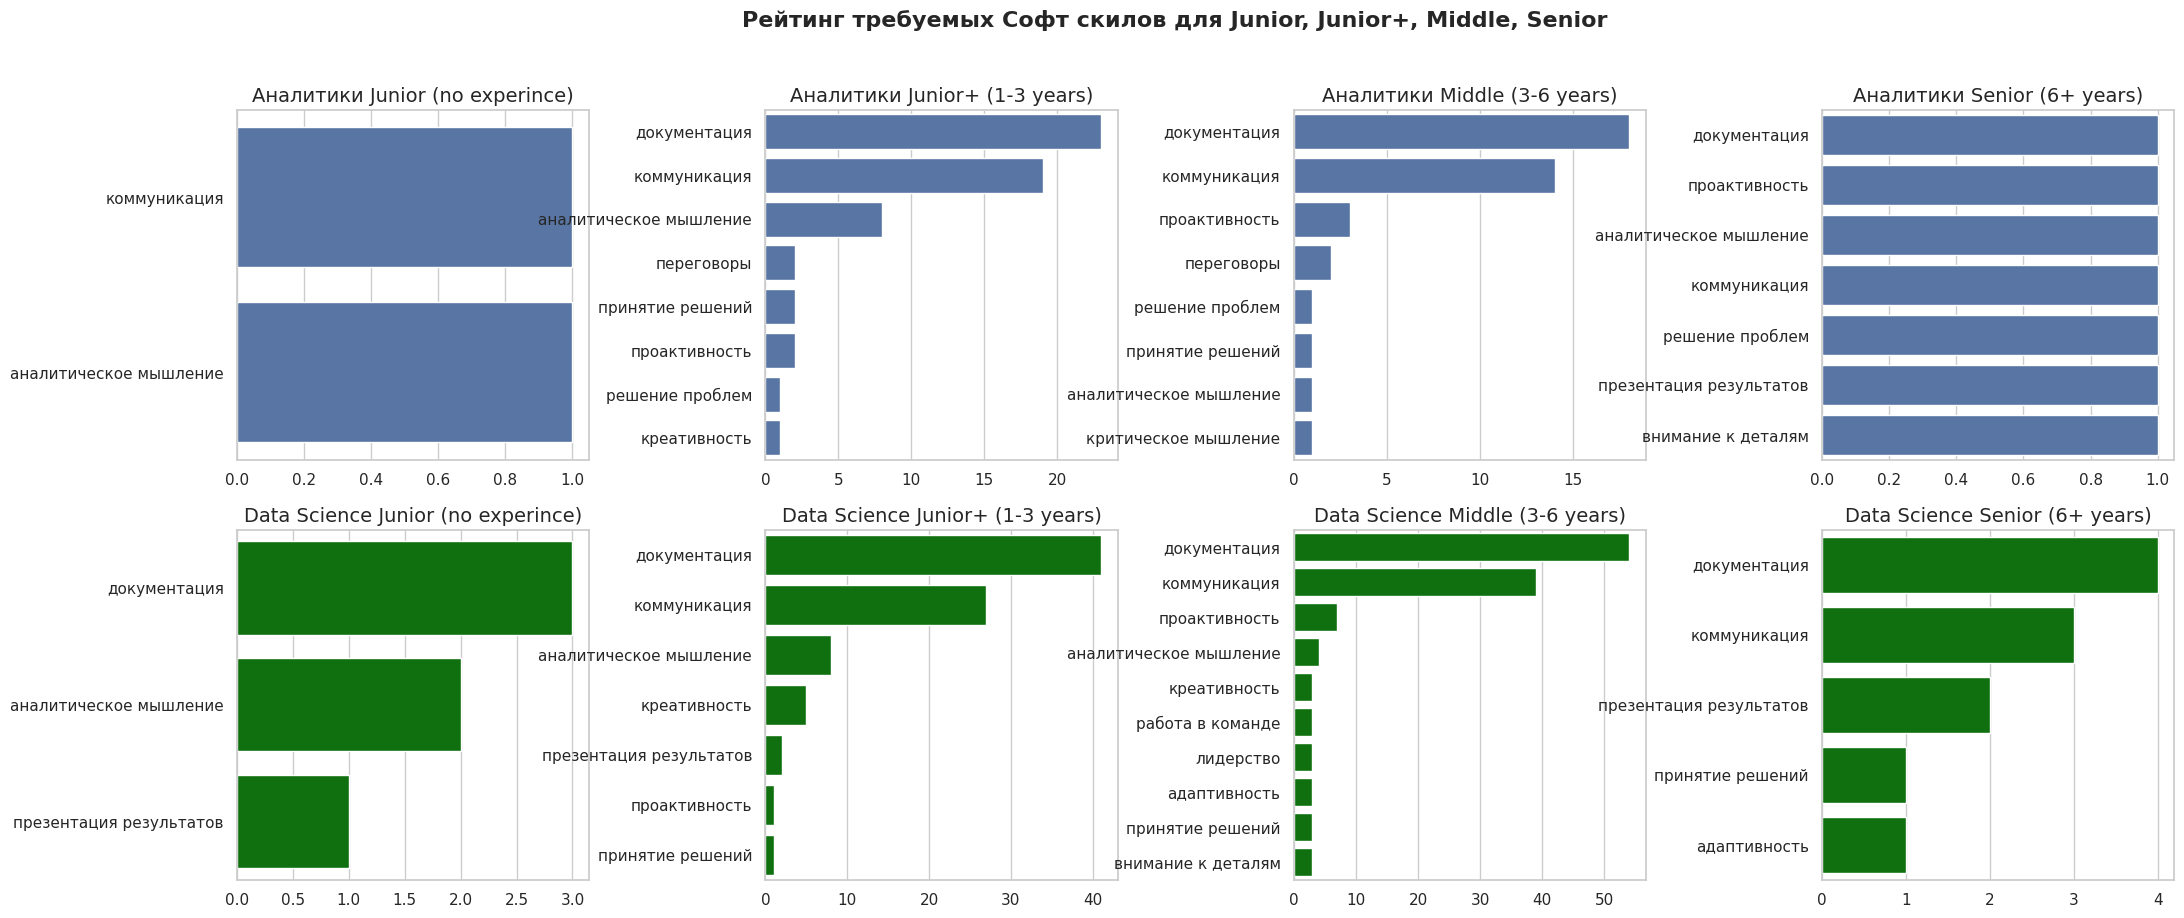

In [508]:
# Построим графики с рейтингом скилов
# Сформируем поле для диаграмм
fig, ax = plt.subplots(2, 4, figsize=(25, 10))

plt.suptitle('Рейтинг требуемых Софт скилов для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

experience = ['Junior (no experince)',
              'Junior+ (1-3 years)',
              'Middle (3-6 years)',
              'Senior (6+ years)']

for i in range(len(experience)):
  da_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'da') & (df_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)
  ds_skils = (
      df_skills.loc[(df_skills['vcancy_type'] == 'ds') & (df_skills['experience'] == f'{experience[i]}')
      , 'soft_skills_from_description']
      .value_counts()).reset_index().head(10)

  # График для аналитиков данных
  sns.barplot(x='count', y='soft_skills_from_description', data=da_skils, ax=ax[0, i])
  ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
  ax[0, i].set_xlabel('')
  ax[0, i].set_ylabel('')


  # График для Специалистов по Data Science
  sns.barplot(x='count', y='soft_skills_from_description', data=ds_skils, ax=ax[1, i], color='green')
  ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
  ax[1, i].set_xlabel('')
  ax[1, i].set_ylabel('')
plt.subplots_adjust(wspace = 0.5)
plt.show()

Информации по Hard и Soft скилам в выборке не достаточно для уверенных выводов. Но на основе имеющихся данных можно уитверждать, что для обеиз профессий наиболее востребованы умение читать (изучать) и составлять документацию и коммуникативность.

## Определим типичные места работы для Аналитика данных и специалиста по Data Science

Отдельно для грейдов Junior, Junior+, Middle, Senior по следующим параметрам:
  - ТОП-работодателей
  - зарплата
  - тип занятости
  - график работы


In [509]:
# Создадим функцию которая будет выводить графики интересующих нас категорий в разрезе грейдов
# Построим графики с рейтингом скилов
# Сформируем поле для диаграмм
def charts_per_grade(df, indicator_, title_):

    fig, ax = plt.subplots(2, 4, figsize=(25, 10))

    plt.suptitle(title_ + ' для Junior, Junior+, Middle, Senior', fontsize=16, fontweight='bold')

    experience = ['Junior (no experince)',
                  'Junior+ (1-3 years)',
                  'Middle (3-6 years)',
                  'Senior (6+ years)']

    for i in range(len(experience)):
      da_skils = (
          df.loc[(df['vcancy_type'] == 'da') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)
      ds_skils = (
          df.loc[(df['vcancy_type'] == 'ds') & (df['experience'] == f'{experience[i]}')
          , indicator_]
          .value_counts()).reset_index().head(10)

      # График для аналитиков данных
      sns.barplot(x='count', y=indicator_, data=da_skils, ax=ax[0, i])
      ax[0, i].set_title(f"Аналитики {experience[i]}", fontsize=14)
      ax[0, i].set_xlabel('')
      ax[0, i].set_ylabel('')


      # График для Специалистов по Data Science
      sns.barplot(x='count', y=indicator_, data=ds_skils, ax=ax[1, i], color='green')
      ax[1, i].set_title(f"Data Science {experience[i]}", fontsize=14)
      ax[1, i].set_xlabel('')
      ax[1, i].set_ylabel('')

    plt.subplots_adjust(wspace = 0.8)
    plt.show()

### ТОП-работодателей

In [510]:
# Подготовим данные
da_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'da']['employer'].value_counts().reset_index().head(10)
ds_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'ds']['employer'].value_counts().reset_index().head(10)

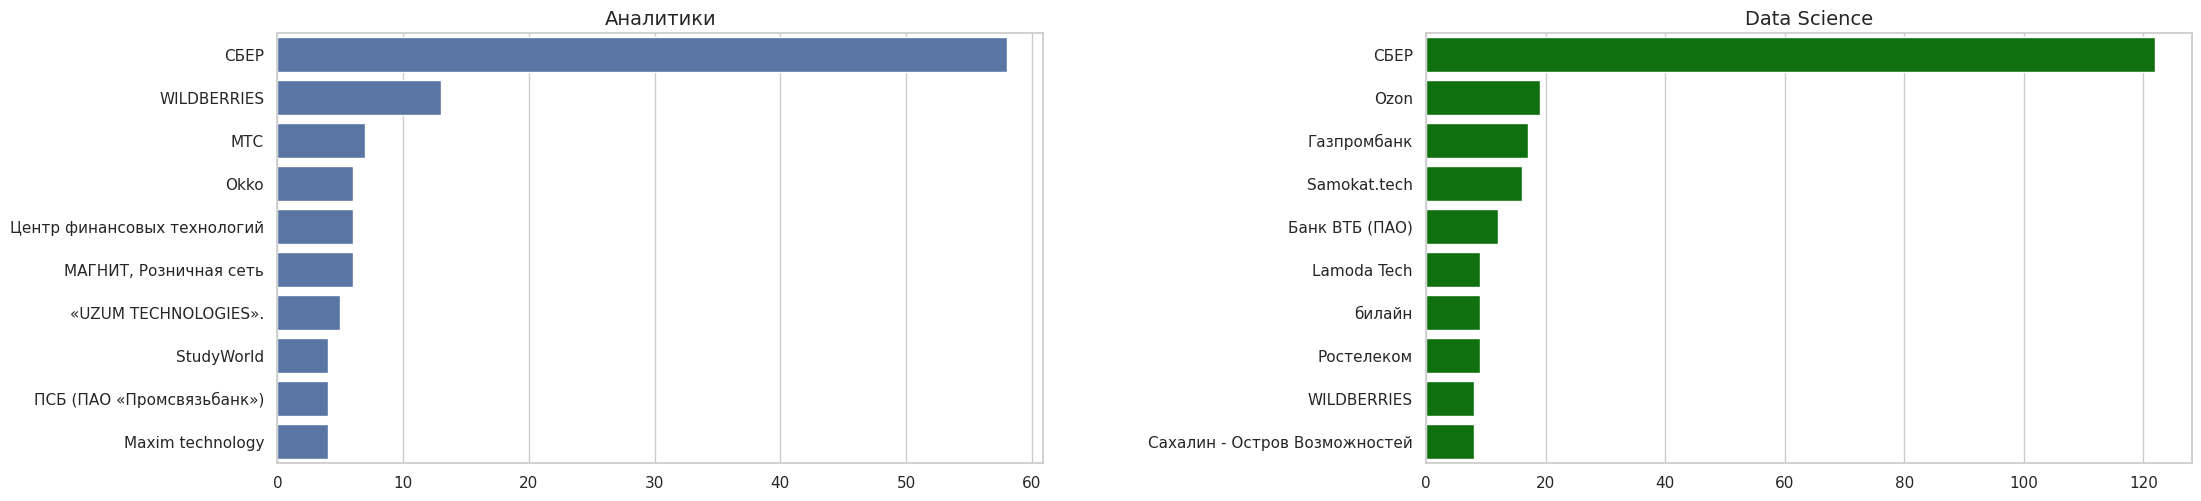

In [511]:
# Сформируем поле для диаграмм
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
fig. tight_layout ()
# График для аналитиков данных
sns.barplot(x='count', y='employer', data=da_df, ax=ax[0])
ax[0].set_title(f"Аналитики", fontsize=14)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

# График для аналитиков данных
sns.barplot(x='count', y='employer', data=ds_df, ax=ax[1], color='green')
ax[1].set_title(f"Data Science", fontsize=14)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.subplots_adjust(wspace = 0.5)
plt.show()

Среди работодателей бесспорным лидером является СБЕР (занимает первое место по количеству вакансий для обеих профессий)
Далее работодатели заинтересованные в специалистах различаются. Так:
 - Аналитиков данных нанимают в основном Вайлберис, МТС, Окко
 - Специалистов по Data Science ищут Озон, Газпромбанк, Самокат, Банк ВТБ

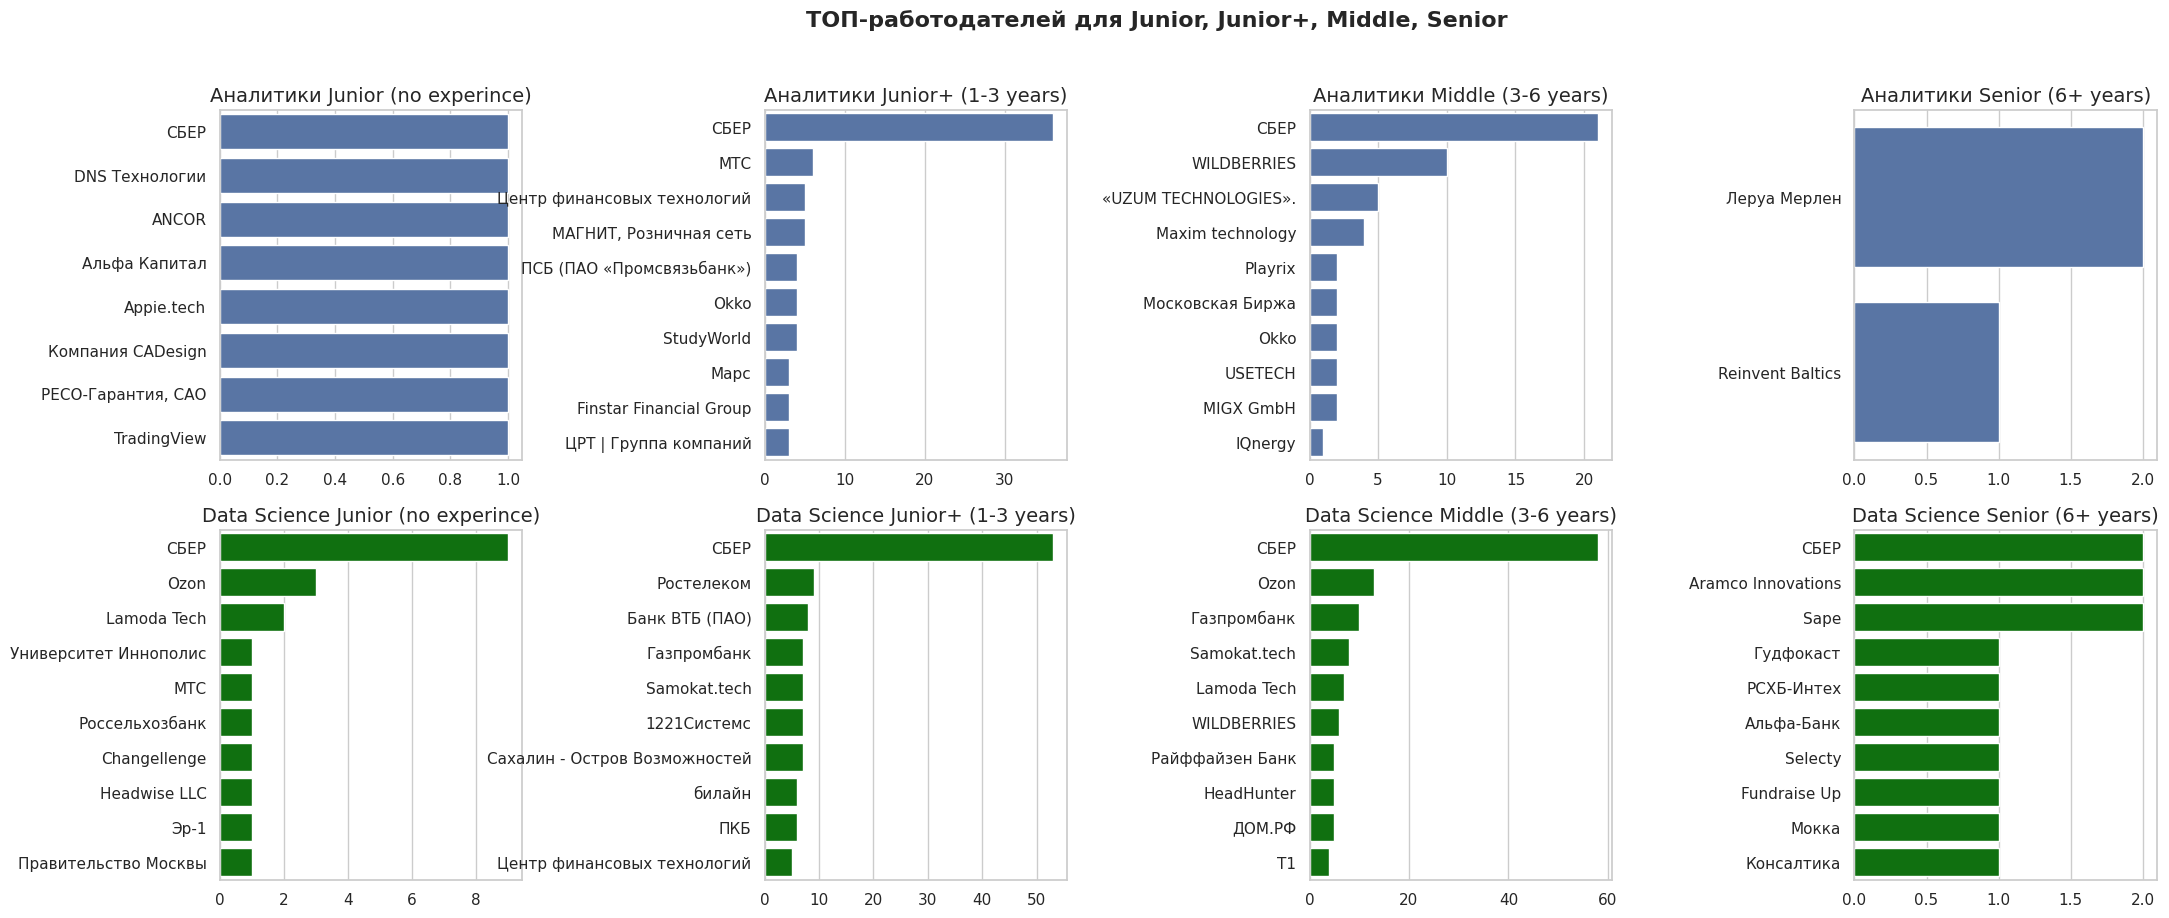

In [512]:
df = all_vacansy
indicator_ = 'employer'
title_ = 'ТОП-работодателей'
charts_per_grade(df, indicator_, title_)

В разрезе по Грейдам
Лидер по всем категориям СБЕР
  -  Аналитиками интересуются:
        - без опыта интересуются - DNS технологии, ANCOR, Альфа капиталл
        - с опытом 1-3 года  - МТС, Центр финансовых технологий, Магнит
        - с опытом 3-6 лет - Вайлберис, УЗУМ Технолоджис, Максим Технолоджис
  - Специалистами по Data Science интересуются:
      - без опыта  - Озон, Ламода, Иннополлис
      - с опытом 1-3 года  - Ростелеком, Банк ВТБ, Газпромбанк
      - с опытом 3-6 лет - Озон, Газпромбанк Самокат

### Зарплата

_________________________________
Проверим, есть ли вакансии у которых категорич "ЗП не указано" но указан верхний или нижний предел зарплаты

In [513]:
# Проверим вакансии в которых категория ЗП не указан а нижняя граница ЗП указана
all_vacansy.loc[(all_vacansy['salary_bin'] == 'ЗП не указана') & (all_vacansy['salary_from']\
                                                                  .notna())]['id'].count()

34

In [514]:
# Проверим вакансии в которы категория ЗП не указан а верхняя граница ЗП указана
all_vacansy.loc[(all_vacansy['salary_bin'] == 'ЗП не указана') & (all_vacansy['salary_to']\
                                                                  .notna())]['id'].count()

0

Проверка показала, что есть 34 вакансии с категорией "ЗП не указано" у которых есть значение нижней границы зарплаты. Поменяем категорию зарплаты с учетом значений нижней границы зарплаты

In [515]:
# Создадим функцию которая изменит категорию зарплат если установлена категори "ЗП не указана"
# а нижняя граница зарплаты заполнена
def salary_category(row: pd.Series):
  if row['salary_bin'] == 'ЗП не указана':
    if row.isna()['salary_from']:
      return 'ЗП не указана'
    elif row['salary_from'] < 100000:
      return 'Меньше 100 тысяч'
    elif row['salary_from'] >= 100000 and row['salary_from'] < 200000:
      return 'От 100 тысяч до 200 тысяч'
    elif row['salary_from'] >= 200000 and row['salary_from'] < 300000:
      return 'От 200 тысяч до 300 тысяч'
    else:
      return 'Больше 300 тысяч'
  else:
    return row['salary_bin']

In [516]:
# Обновим значения в столбце `salary_bin`
all_vacansy['salary_bin'] = all_vacansy.apply(salary_category, axis=1)

In [517]:
# Подготовим данные для визуализации
da_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'da']['salary_bin']\
.value_counts().reset_index().head(10)

ds_df = all_vacansy.loc[all_vacansy['vcancy_type']== 'ds']['salary_bin']\
.value_counts().reset_index().head(10)

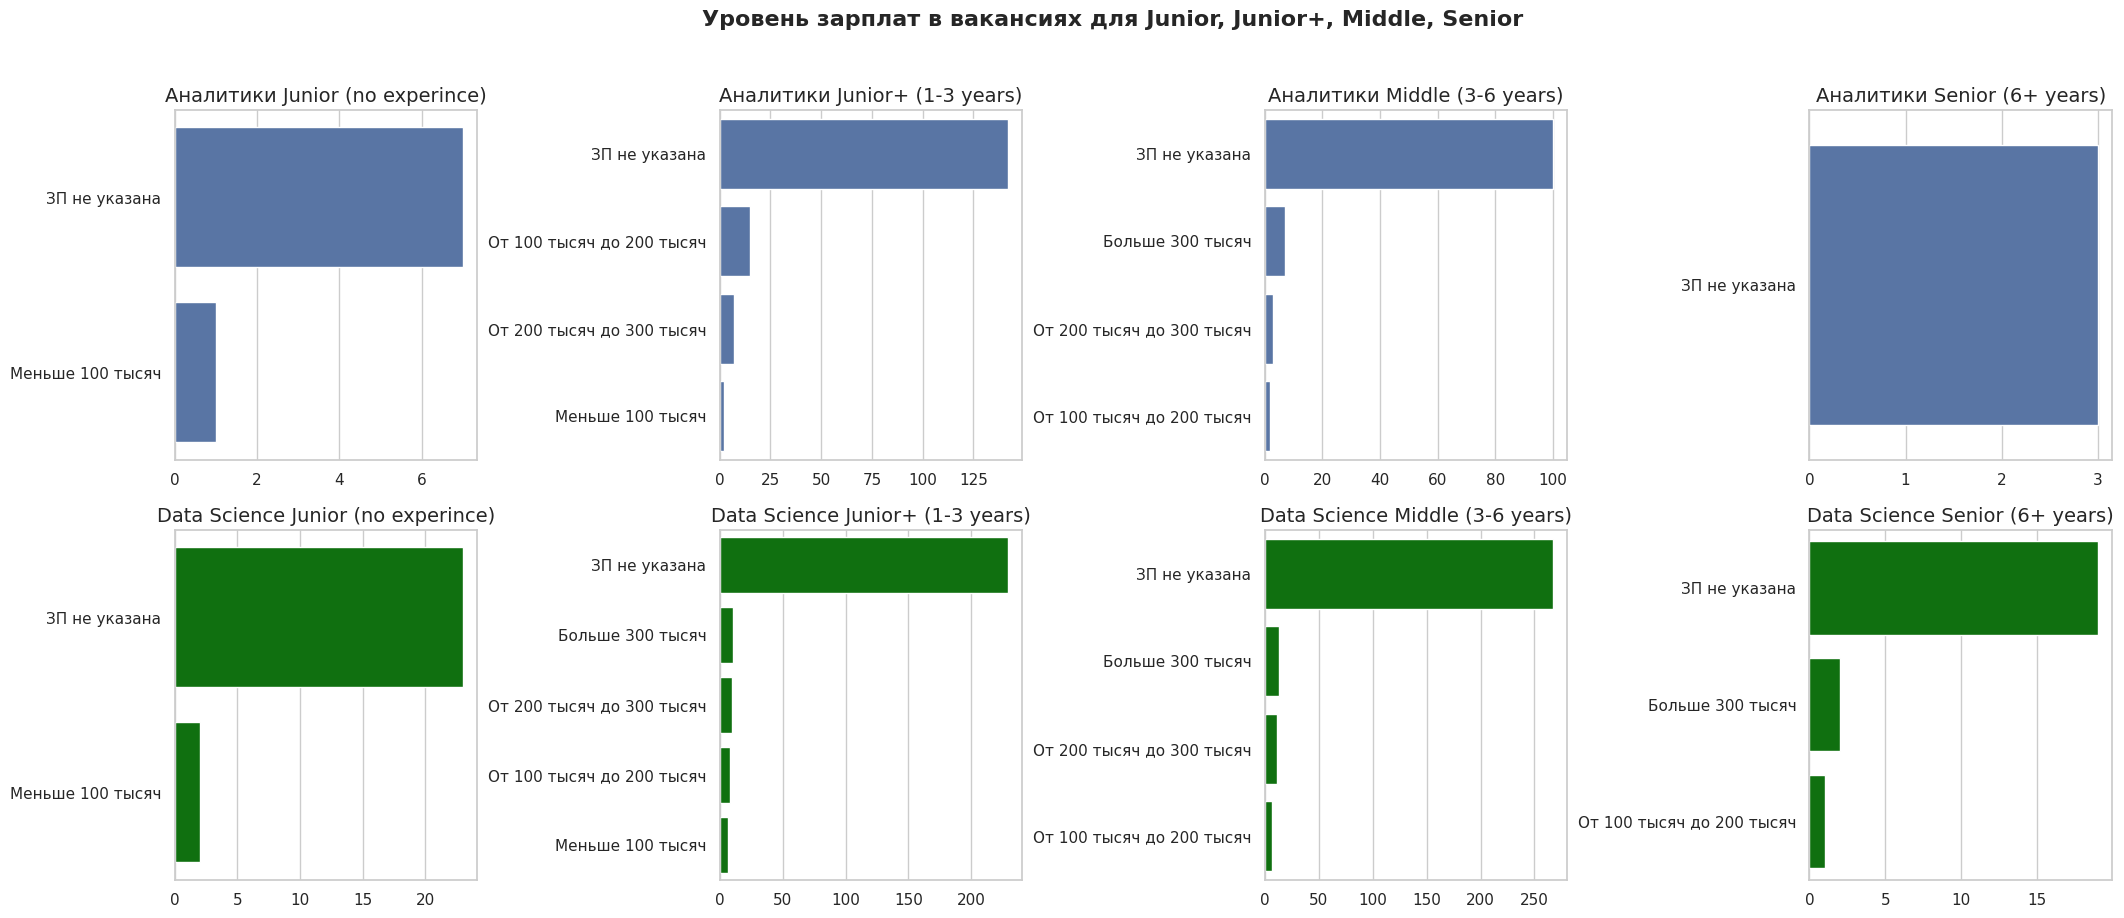

In [518]:
df = all_vacansy
indicator_ = 'salary_bin'
title_ = 'Уровень зарплат в вакансиях'
charts_per_grade(df, indicator_, title_)

Анализ указанного в вакансиях уровня оплаты труда показывает что
 - менее 100 тыс.руб. предлагается только специалистам уровня Junior и Junior+
 - от 200 до 300 тыс. руб - вилка характерна для соискателей уровня Middle
 - более 300 тыс. руб встречается у Специалистов по Data Science  более 300 тыс. руб

У специалистов уровня Middle для обеих профессий встречается зарплата  более 300 тыс. руб. но эти данные дольше похожи на "разведку боем" со стороны работодателей (уловка для пополнения базы кандидатов) и требуют дополнительной проверки.

### Тип занятости

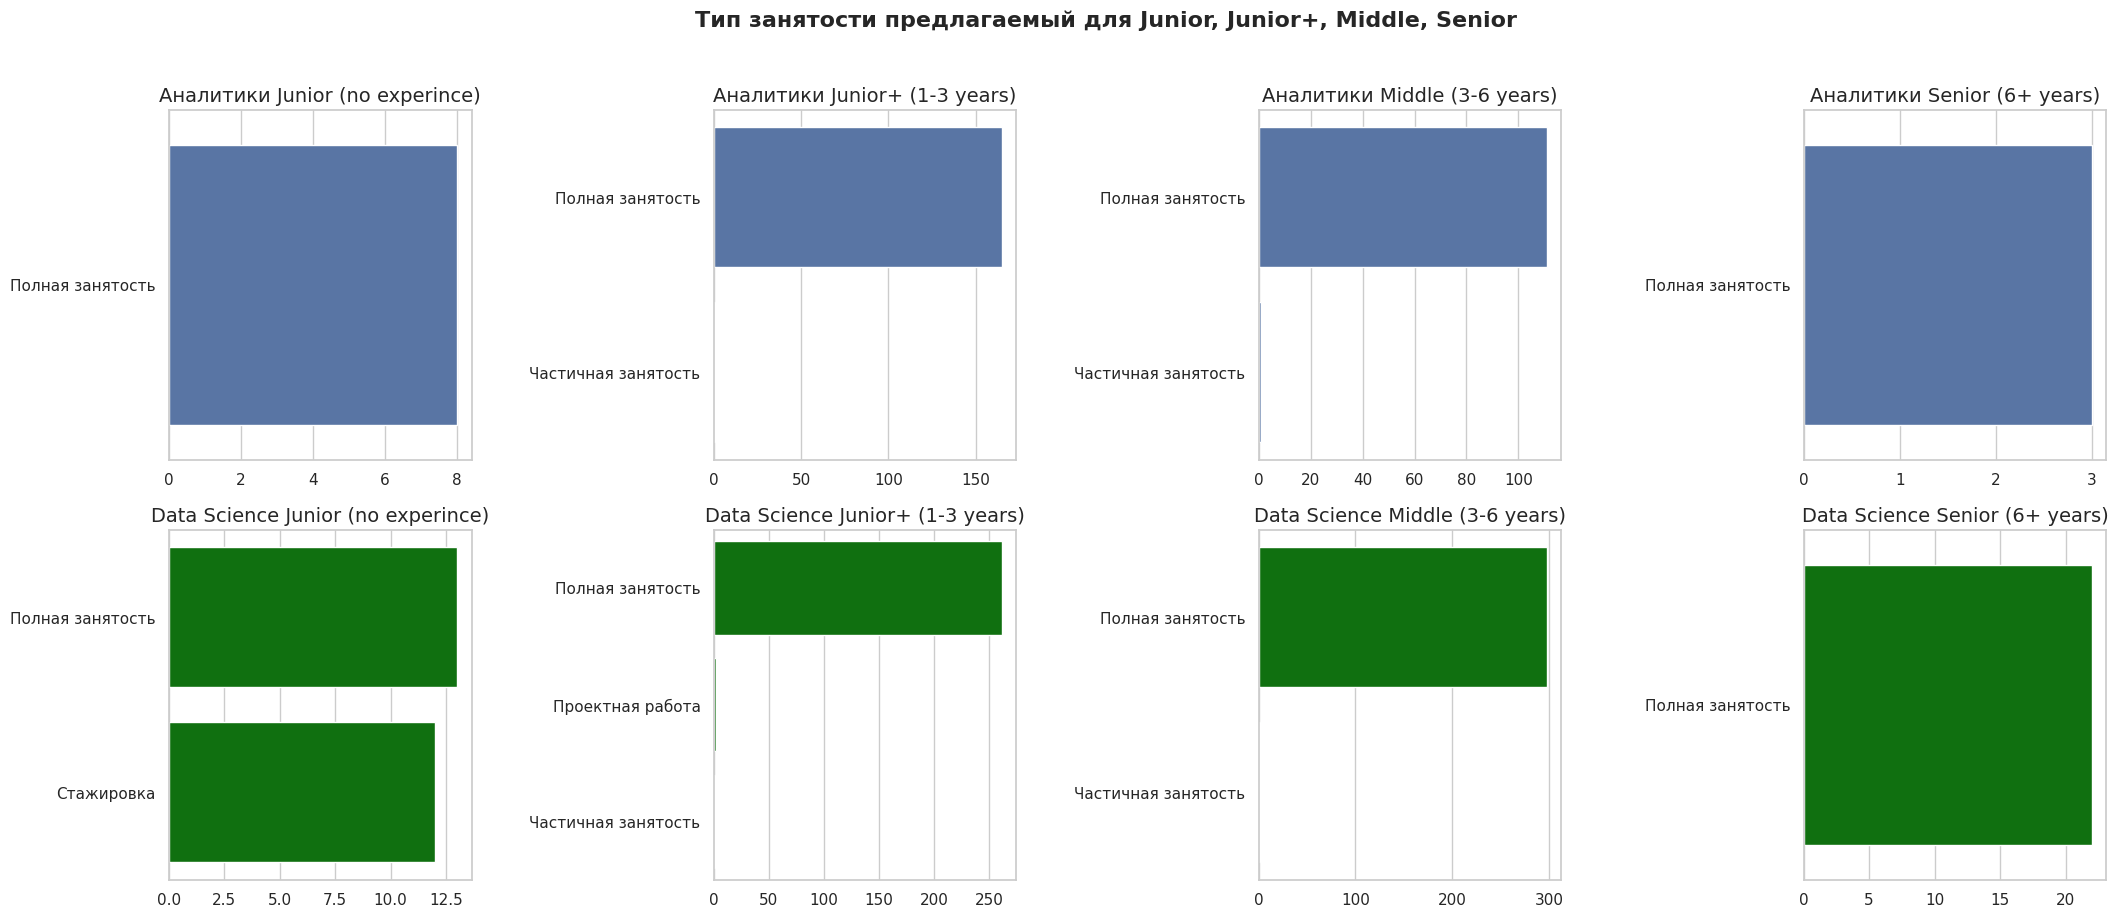

In [519]:
df = all_vacansy
indicator_ = 'employment'
title_ = 'Тип занятости предлагаемый'
charts_per_grade(df, indicator_, title_)

Анализ предлагаемого типа занятости указывает на стремление работодателей нанимать постоянных сотрудников (не совместителей) на полный рабочий день.
И только для Специалистов по Data Science предлагаются стажировки (что подразумевает частичную занятость)

### График работы

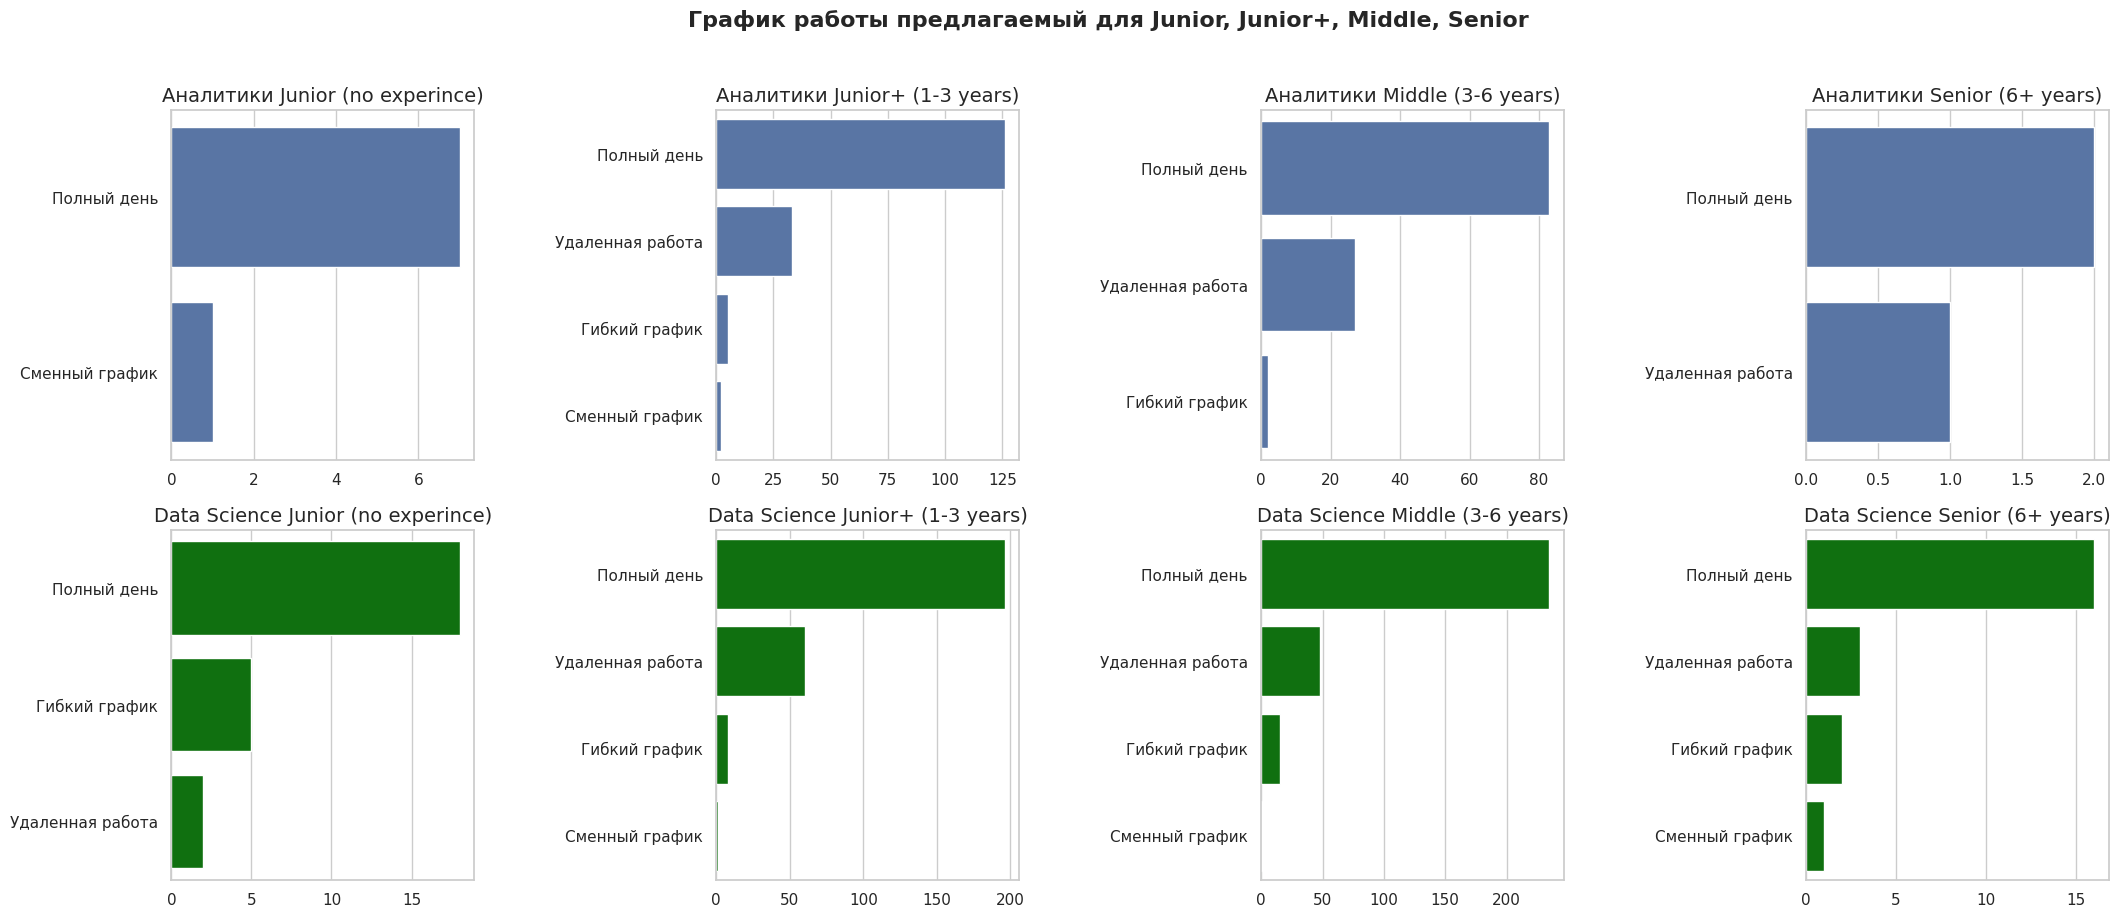

In [520]:
df = all_vacansy
indicator_ = 'schedule'
title_ = 'График работы предлагаемый'
charts_per_grade(df, indicator_, title_)

Предлагаемый график работы подтверждает стремление работодателей нанимать специалистов обеих профессий на полный день. По мере увеличения опыта работы специалистов увеличивается количество предложений на удаленную работу. При этом, Гибкий и сменный график указан в минимальном количестве вакансий для специалистов обеих профессий и всех уровней.

## Расчитаем динамику количества вакансий для Аналитика данных и специалиста по Data Science

(Отдельно для грейдов Junior, Junior+, Middle, Senior)

In [521]:
vacansy_per_date = pd.concat([df_da, df_ds])

In [523]:
vacansy_per_date = vacansy_per_date[['id', 'vcancy_type', 'published_at']].sort_values(by='published_at')

In [524]:
vacansy_per_date['published_at'] = vacansy_per_date['published_at'].dt.date

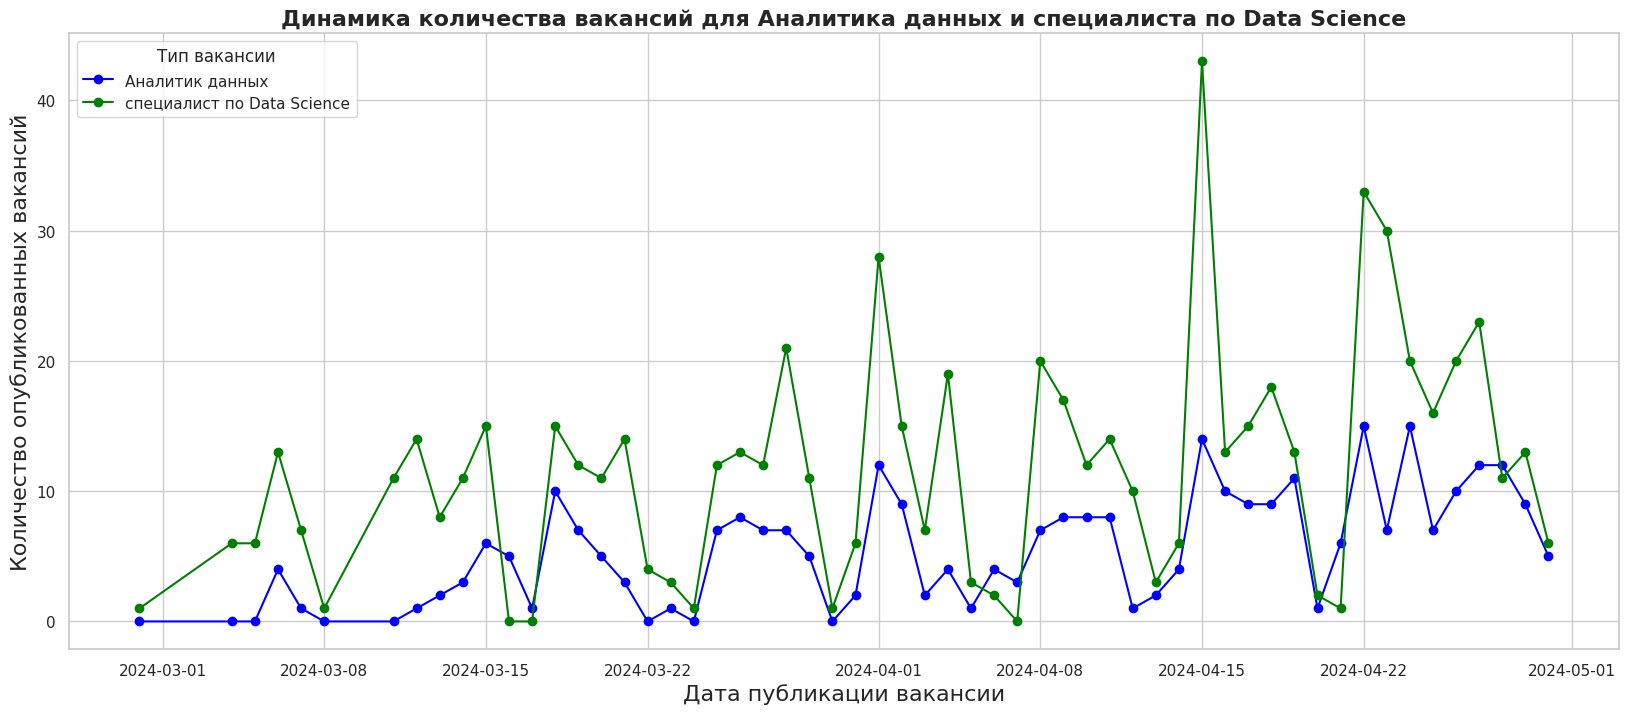

In [525]:
vacansy_per_date.pivot_table(index='published_at', columns='vcancy_type', values = 'id', aggfunc='count')\
.fillna(0)\
.plot(figsize=(20, 8), style='o-', grid=True, color=['blue', 'green'])

plt.title('Динамика количества вакансий для Аналитика данных и специалиста по Data Science',
          fontsize=16, fontweight='bold')
plt.xlabel('Дата публикации вакансии', fontsize=16)
plt.xticks(rotation=0)
plt.ylabel('Количество опубликованных вакансий', fontsize=16)
plt.legend(['Аналитик данных', 'специалист по Data Science'], title='Тип вакансии', loc=2)
plt.show()

Динамика количества вакансий для Аналитика данных и специалиста по Data Science показывает, что на протяжении наблюдаемого периода Специалисты по Data Science пользуются большим спросом. Характер изменения кривых для обеиз профессий идентичен, но количество вакансий Специалистов по Data Science всегда больше.

## ОБЩИЙ ВЫВОД

### Исходные данные
Для анализа мы использовали публикации вакансий на НН. По одной и той же вакансии встречается несколько публикаций (работодатели иногда убирают публикацию в архив и позже размещают новую публикацию по той же вакансии).

Мы видим, что у вакансий с дублирующимся id отлтичается только вид вакансии. Значит это одни и те же публикации которые отнесены и к вакансиям Аналитик данных и к Датасайентисиам.

В исследовании такие дубли не удалялись, так как фактически это существующие вакансии со своим набором требований применимые к обоим типам вакансий и должны быть учтены в статистике при раздельном анализе.

Публикации вакансий с разными айди и датой публикации но идентичными данными в остальных полях - это дублирующиеся публикации одной вакансии. Такие дубли удалены из выборки.

Удалили 7.41% данных

Дублирующиеся публикации одной вакансии учитывались только при построении графика Динамика количества вакансий (так как они отражают потребность в специалистах в разрезе даты публикации).

В выборке присутствует 548 уникальных названий вакансий. Часть названий содержит дополнительную информацию не относящуюся к названию.

ТОП 10 работодаелей по количеству опубликованных вакансий

 - СБЕР - 180
 - WILDBERRIES - 21
 - Ozon - 19
 - Газпромбанк  -  17
 - Samokat.tech  -    16
 - Центр финансовых технологий  -  12
 - Банк ВТБ (ПАО) - 12
 - МТС - 11
 - Okko - 10
 - Lamoda Tech - 9


 ТОП 10 городов по количеству опубликованных вакансий
 - Москва - 690
 - Санкт-Петербург - 96
 - Новосибирск - 18
 - Екатеринбург - 17
 - Нижний Новгород - 16
 - Казань - 14
 - Краснодар - 7
 - Томск - 5
 - Воронеж - 4
 - Ростов-на-Дону - 4

После заполнения пропусков по категориальным значениям связанным с требованиями к навыкам соискателей, количество пропусков составляет:

 - ключевые навыки - не заполнено 18.5 %
 - хард скилы - не заполнено 57.2 %
 - софт скилы - не заполнено 70.8 %
В дальнейшем анализе основной упор будем делать на ключевые навыки как на более заполненные данные

### Анализ данных
**Из анализ распределения грейдов в опубликованных вакансиях видно что:**
 - на должность Аналитик данных предпочитают нанимать соискателей категории Junior+ с опытом от 1 до 3 лет

 - для должности Специалист по Data Science больший спрос на соискателей категории Middle с опытом от 3 до 6 лет

 - для обеих профессий примерно одинаковое количество вакансий для соискателей без опыта (3-4%)

Интересно, что потребность в кандидатах уровеня Senior у Аналитиков данных всего 1%, тогда как для Специалист по Data Science 4%

**Рейтинг ключевых навыков соискателей которые работодатель указывает в вакансиях показывает, что:**
 - для обеих профессий наиболее важными навыками являются владение зыком програмирования PYTHON и языком запросов SQL и основы статистики, то логично, т.к. основа деятельности это извлечение, обработка и анализ информации.

 - основные отличия в том, что от  Аналитиков данных работодатели ожидают владения Excel и инструментами построения Дашбордов (Tableu, Grafana, Power BI), а от Специалистов по Data Science владение специализированными библиотеками Scikit-learn, PyTorch и TensorFlow.

Информации по Hard и Soft скилам в выборке не достаточно для уверенных выводов. Но на основе имеющихся данных можно уитверждать, что для обеих профессий наиболее востребованы умение читать (изучать) и составлять документацию и коммуникативность.

**ТОП работодателей**

Среди работодателей бесспорным лидером является СБЕР (занимает первое место по количеству вакансий для обеих профессий)
Далее работодатели заинтересованные в специалистах различаются. Так:
 - Аналитиков данных нанимают в основном Вайлберис, МТС, Окко
 - Специалистов по Data Science ищут Озон, Газпромбанк, Самокат, Банк ВТБ


**В разрезе по Грейдам**
Лидер по всем категориям СБЕР
  -  Аналитиками интересуются:
        - без опыта интересуются - DNS технологии, ANCOR, Альфа капиталл
        - с опытом 1-3 года  - МТС, Центр финансовых технологий, Магнит
        - с опытом 3-6 лет - Вайлберис, УЗУМ Технолоджис, Максим Технолоджис
  - Специалистами по Data Science интересуются:
       - без опыта интересуются - Озон, Ламода, Иннополлис
       - с опытом 1-3 года  - Ростелеком, Банк ВТБ, Газпромбанк
       - с опытом 3-6 лет - Озон, Газпромбанк Самокат

**Анализ указанного в вакансиях уровня оплаты труда показывает что:**
 - менее 100 тыс.руб. предлагается только специалистам уровня Junior и Junior+
 - от 200 до 300 тыс. руб - вилка характерна для соискателей уровня Middle
 - более 300 тыс. руб встречается у Специалистов по Data Science  более 300 тыс. руб

У специалистов уровня Middle для обеих профессий встречается зарплата  более 300 тыс. руб. но эти данные дольше похожи на "разведку боем" со стороны работодателей (уловка для пополнения базы кандидатов) и требуют дополнительной проверки.

**Анализ предлагаемого типа занятости** указывает на стремление работодателей нанимать постоянных сотрудников (не совместителей) на полный рабочий день. И только для Специалистов по Data Science предлагаются стажировки (что подразумевает частичную занятость)

**Предлагаемый график работы** подтверждает стремление работодателей нанимать специалистов обеих профессий на полный день. По мере увеличения опыта работы специалистов увеличивается количество предложений на удаленную работу. При этом, Гибкий и сменный график указан в минимальном количестве вакансий для специалистов обеих профессий и всех уровней.

**Динамика количества вакансий** для Аналитика данных и специалиста по Data Science показывает, что на протяжении наблюдаемого периода Специалисты по Data Science пользуются большим спросом. Характер изменения кривых для обеиз профессий идентичен, но количество вакансий Специалистов по Data Science всегда больше.